<a href="https://colab.research.google.com/github/yomyaykya/yomyay/blob/master/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
import pandas as pd
import seaborn as sns

In [2]:
# Enable inline plots
%matplotlib inline
# Set plot style
sns.set(style="ticks")
# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [3]:
pd.set_option("display.width", 70)

In [5]:
data = pd.read_csv("./SolarPrediction.csv")

In [6]:
data["UNIXTime"] = (pd
.to_datetime(data["UNIXTime"], unit="s", utc=True)
.dt.tz_convert("Pacific/Honolulu"))
data["Data"] = data["UNIXTime"].dt.date
data["Time"] = data["UNIXTime"].dt.time
data["TimeSunRise"] = (pd
.to_datetime(data["TimeSunRise"],
infer_datetime_format=True)
.dt.time)
data["TimeSunSet"] = (pd
.to_datetime(data["TimeSunSet"],
infer_datetime_format=True)
.dt.time)
data = data.rename({"Data": "Date",
"WindDirection(Degrees)": "WindDirection"},
axis=1)

In [7]:
data.dtypes

UNIXTime         datetime64[ns, Pacific/Honolulu]
Date                                       object
Time                                       object
Radiation                                 float64
Temperature                                 int64
Pressure                                  float64
Humidity                                    int64
WindDirection                             float64
Speed                                     float64
TimeSunRise                                object
TimeSunSet                                 object
dtype: object

In [8]:
data.head()

,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
0,2016-09-29 23:55:26-10:00,2016-09-29,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,2016-09-29 23:50:23-10:00,2016-09-29,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,2016-09-29 23:45:26-10:00,2016-09-29,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,2016-09-29 23:40:21-10:00,2016-09-29,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,2016-09-29 23:35:24-10:00,2016-09-29,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [9]:
def time_to_second(t):
  return ((datetime.combine(datetime.min, t) - datetime.min)
    .total_seconds())

In [10]:
df = data.copy()
df["Day"] = df["UNIXTime"].dt.dayofyear
df["TimeInSeconds"] = df["Time"].map(time_to_second)
sunrise = df["TimeSunRise"].map(time_to_second)
sunset = df["TimeSunSet"].map(time_to_second)
df["DayPart"] = (df["TimeInSeconds"] - sunrise) / (sunset - sunrise)
df = df.drop(["UNIXTime", "Date", "Time",
"TimeSunRise", "TimeSunSet"], axis=1)
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,Day,TimeInSeconds,DayPart
0,1.21,48,30.46,59,177.39,5.62,273,86126.0,1.475602
1,1.21,48,30.46,58,176.78,3.37,273,85823.0,1.468588
2,1.23,48,30.46,57,158.75,3.37,273,85526.0,1.461713
3,1.21,48,30.46,60,137.71,3.37,273,85221.0,1.454653
4,1.17,48,30.46,62,104.95,5.62,273,84924.0,1.447778


In [11]:
df.dtypes

Radiation        float64
Temperature        int64
Pressure         float64
Humidity           int64
WindDirection    float64
Speed            float64
Day                int64
TimeInSeconds    float64
DayPart          float64
dtype: object

In [12]:
df.shape

(32686, 9)

In [13]:
df.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,Day,TimeInSeconds,DayPart
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,306.110965,43277.574068,0.482959
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,34.781367,24900.749819,0.602432
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,245.000000,1.000000,-0.634602
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,277.000000,21617.000000,-0.040139
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,306.000000,43230.000000,0.484332
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,334.000000,64849.000000,1.006038
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,366.000000,86185.000000,1.566061


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


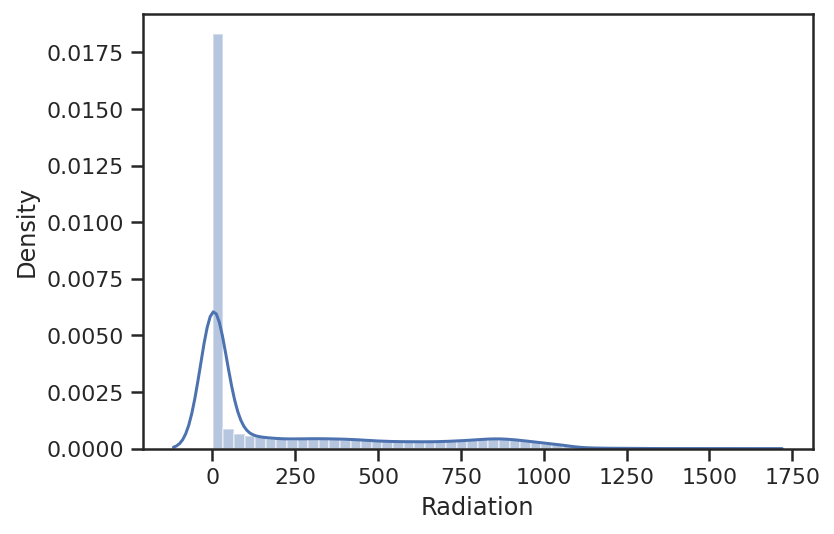

In [14]:
sns.distplot(df["Radiation"]);

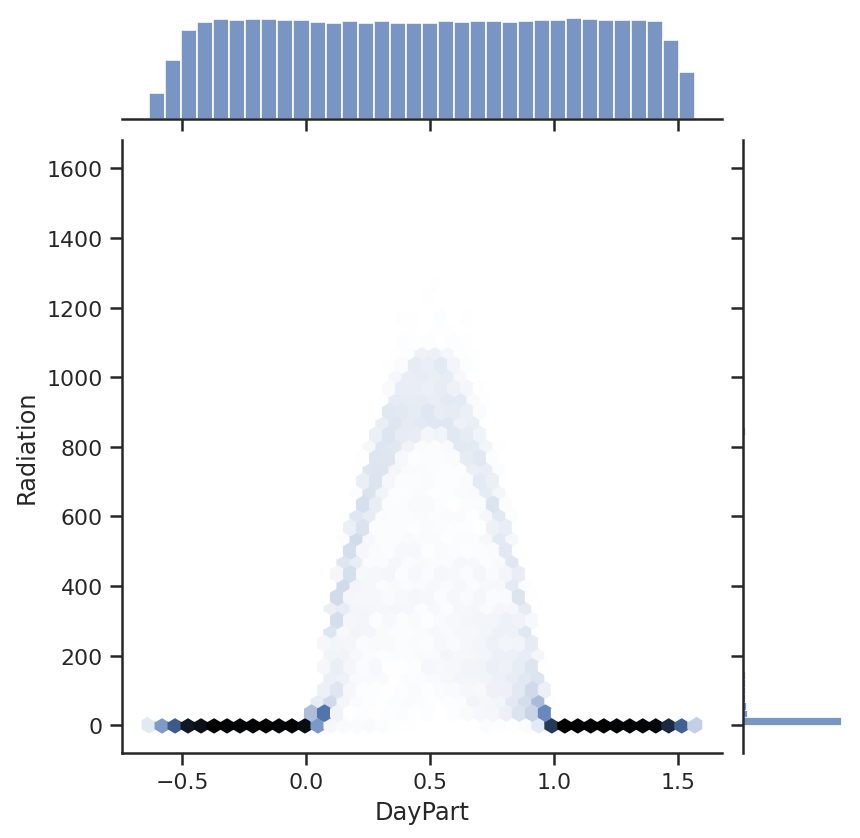

In [15]:
sns.jointplot(x="DayPart", y="Radiation", data=df, kind="hex");

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


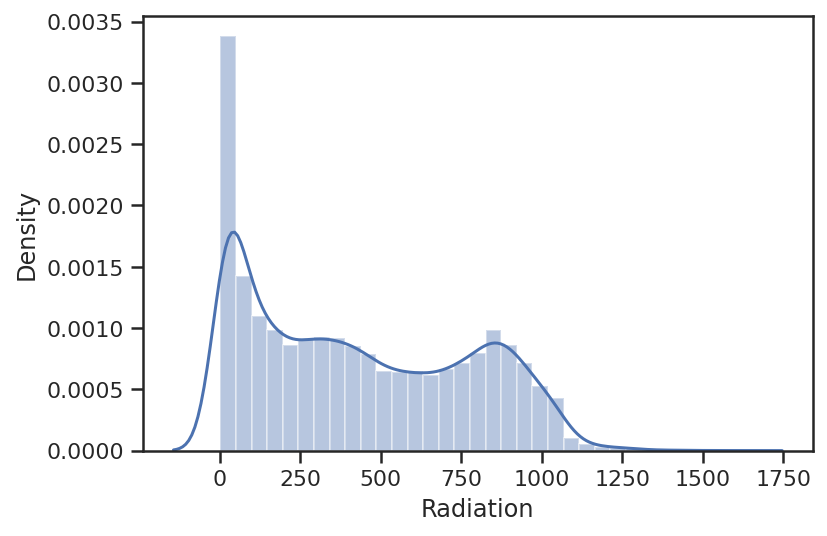

In [16]:
dfd = df[(df["DayPart"] >= 0) & (df["DayPart"] <= 1)]
sns.distplot(dfd["Radiation"]);

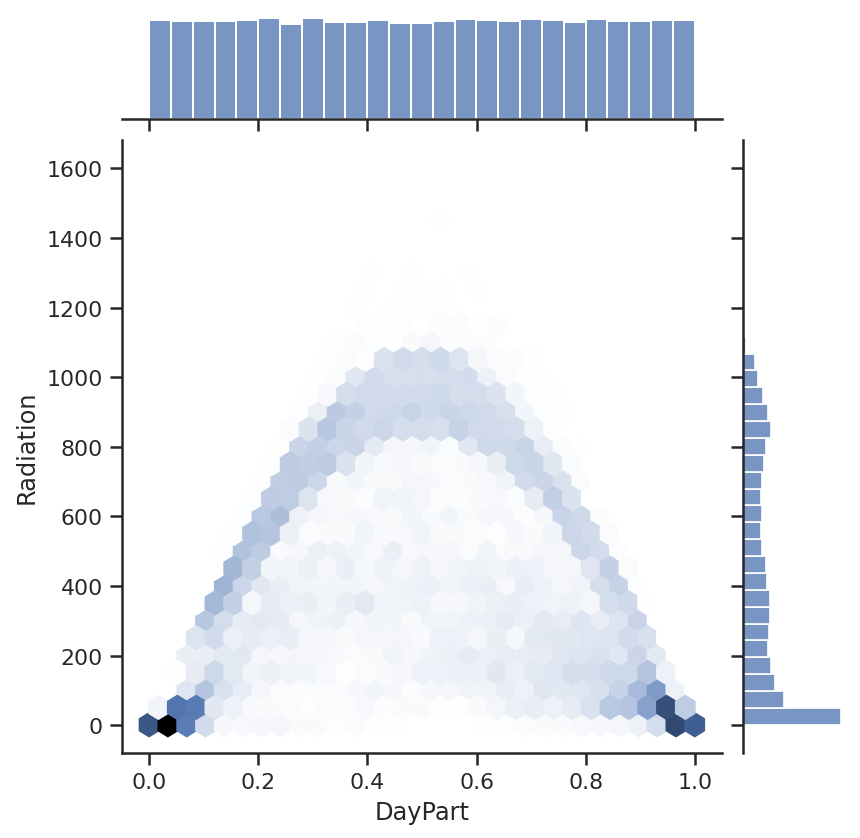

In [17]:
sns.jointplot(x="DayPart", y="Radiation", data=dfd, kind="hex");

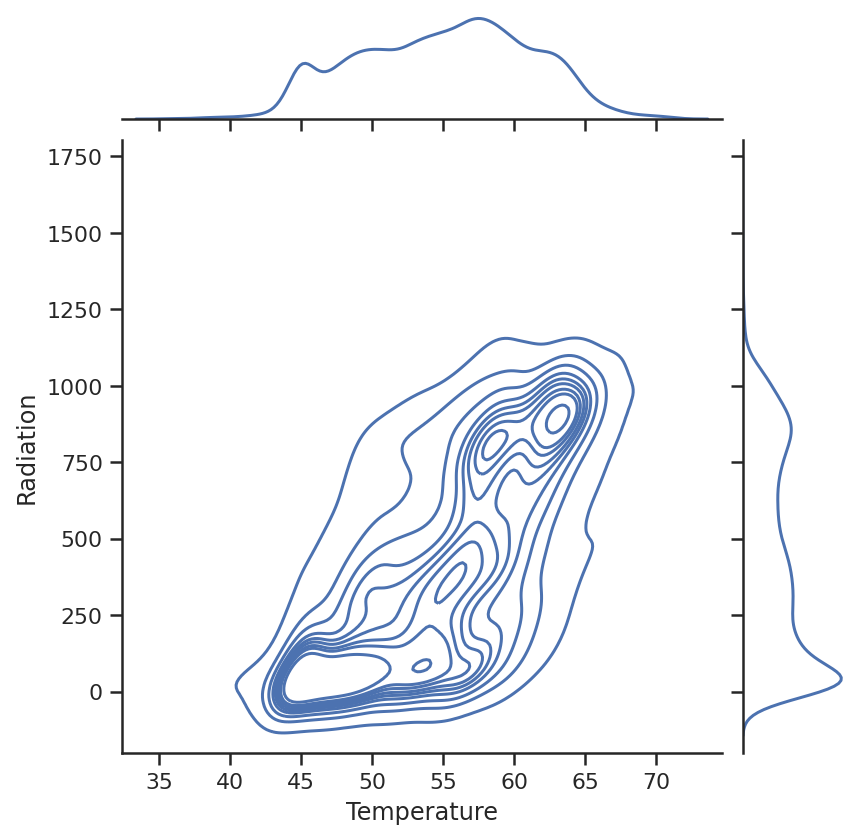

In [18]:
sns.jointplot(x="Temperature", y="Radiation", data=dfd, kind="kde");

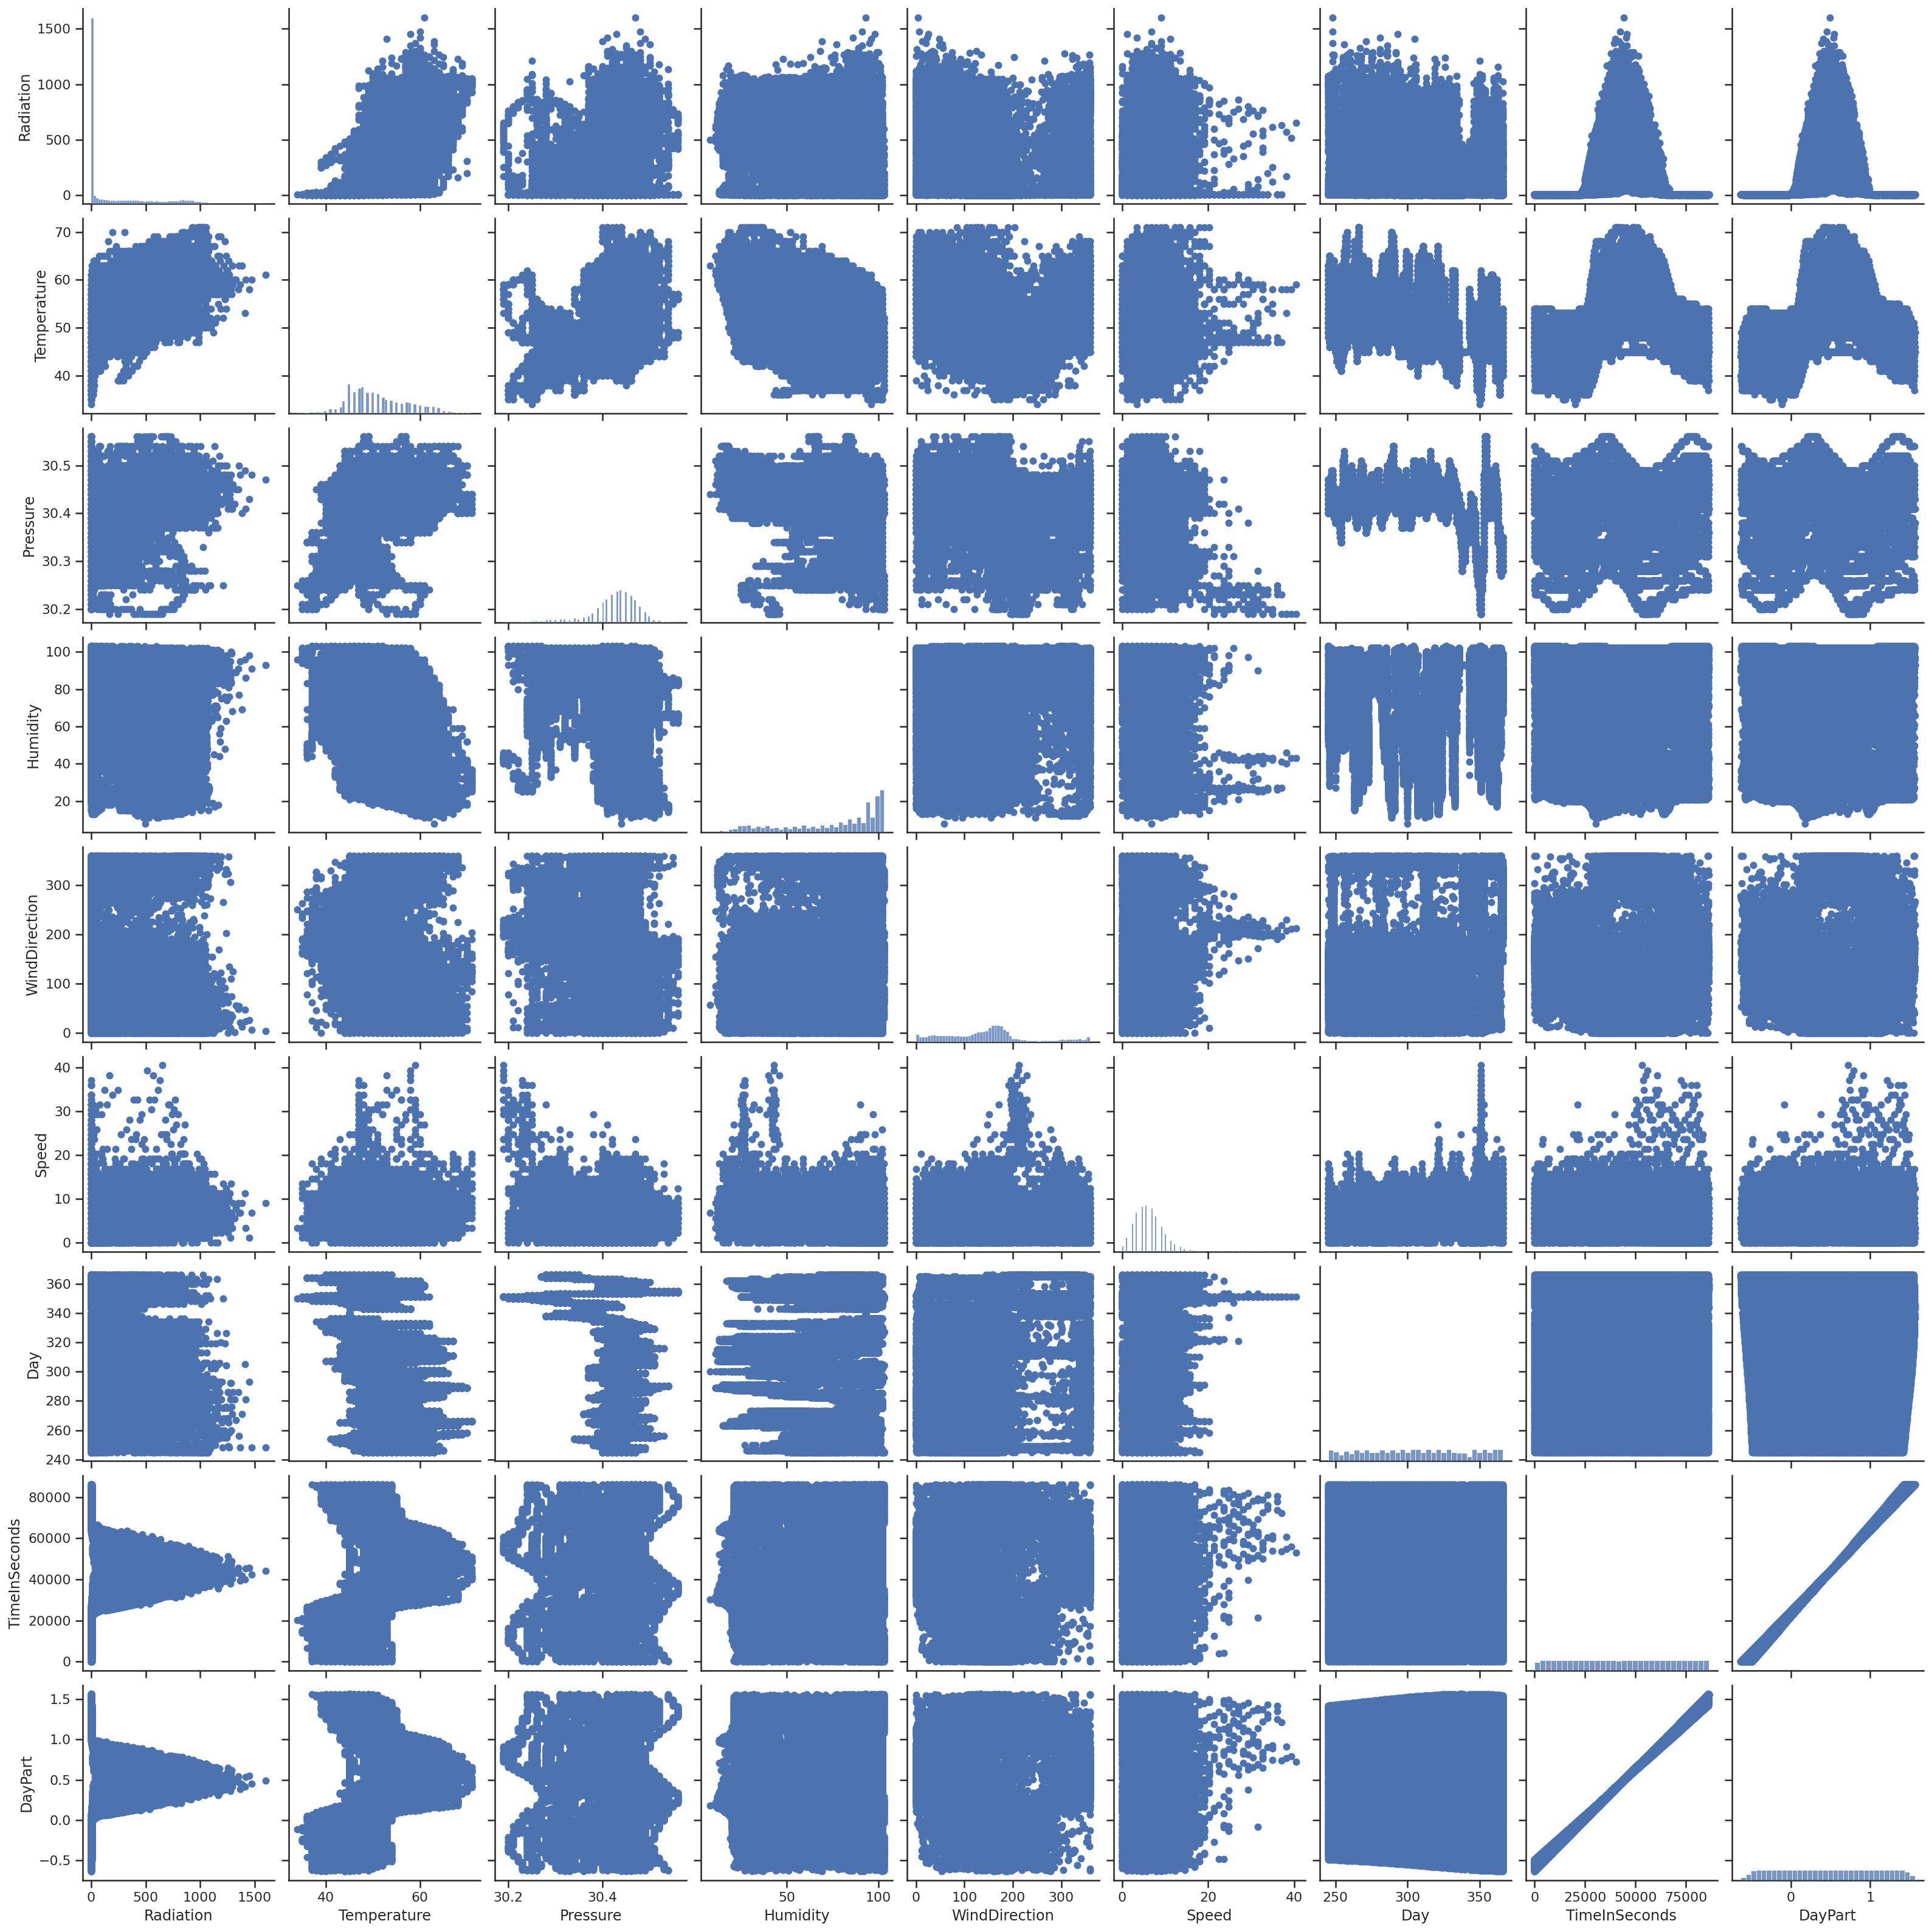

In [19]:
sns.pairplot(df, plot_kws=dict(linewidth=0));

In [20]:
df.corr()

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,Day,TimeInSeconds,DayPart
Radiation,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,-0.081320,0.004348,0.005980
Temperature,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,-0.370794,0.197227,0.198520
Pressure,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,-0.332762,0.091066,0.094403
Humidity,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,-0.063760,0.077851,0.075513
WindDirection,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,0.153255,-0.077956,-0.078130
Speed,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,0.174336,-0.057908,-0.056095
Day,-0.081320,-0.370794,-0.332762,-0.063760,0.153255,0.174336,1.000000,-0.007094,-0.010052
TimeInSeconds,0.004348,0.197227,0.091066,0.077851,-0.077956,-0.057908,-0.007094,1.000000,0.998980
DayPart,0.005980,0.198520,0.094403,0.075513,-0.078130,-0.056095,-0.010052,0.998980,1.000000


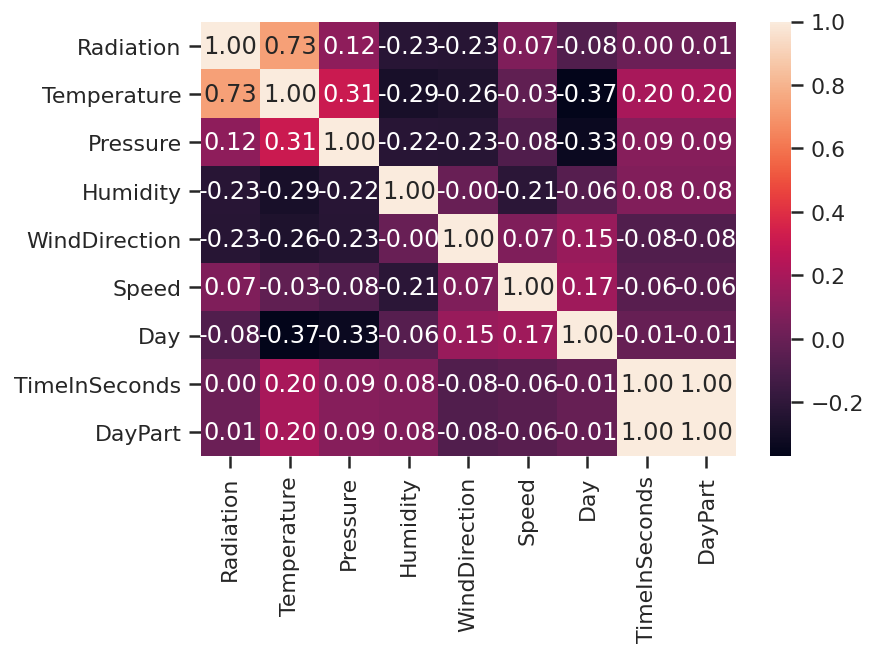

In [21]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

# New Section